Set –A

1.Generate a dataset using the following statement:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=4,n_informative=4,n_redundant=0,n_clusters_per_class=1,random_state=60)

2.Print the total number of data points, number of features and no. of classes in your dataset. Also, print the number of data points in each class.

3.Split your data into train (60%), cross-validation (20%) and test (20%) sets and print the sizes of these sets.

4.Perform data pre-processing using column standardisation.

5.Perform the modelling using K-Nearest NeighbourMethod(you can use sklearn’simplementation of K-NN).
  
  a)In  K-NN  implementation,  use  the  distance  measure  as  "cosine  distance  metric"  for computing the nearest neighbours). DO NOT USEthe default one i.e. 'euclidean'.
  b)Validate your model for the given values of K: [1,3,5,7,9,11,13,15]and print the accuracies.Plot the graph: 'K vs. Accuracy'. Find the optimal Kand print its value.
  c)Predict and print the class label for every data point in Test Set,and overallaccuracy on  the  test  dataset.  Remember  that  here  also  you  have  to  use  the  COSINE  distance metric.

# Answer - 1
Generate a dataset using the following statement:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=4,n_informative=4,n_redundant=0,n_clusters_per_class=1,random_state=60)

In [ ]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=4,n_informative=4,n_redundant=0,n_clusters_per_class=1,random_state=60)

In [ ]:
import numpy as np
import pandas as pd

# Answer - 2
Print the total number of data points, number of features and no. of classes in your dataset.Also, print the number of data points in each class.

In [ ]:
x.shape

(1000, 4)

In [ ]:
print(f"Total number of data points : {len(x)}")

Total number of data points : 1000


In [ ]:
print(f"Number of features : {len(x[0])}")

Number of features : 4


In [ ]:
temp = pd.DataFrame({'target': y})
print(f"Number of classes : {temp['target'].nunique()}")

Number of classes : 2


In [ ]:
print(f"Number of data points in each class : \n{temp['target'].value_counts()}")

Number of data points in each class : 
0    501
1    499
Name: target, dtype: int64


# Answer - 3
Split your data into train (60%), cross-validation (20%) and test (20%) setsand print the sizes of these sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,train_size=0.6)

# Answer - 4
Perform data pre-processing using column standardisation.

In [ ]:
from sklearn.preprocessing import StandardScaler
from math import sqrt, exp

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
mean = list(scaler.mean_)
sd = [sqrt(i) for i in scaler.var_]
for i in range(len(X_test)):
  for j in range(len(X_test[0])):
    X_test[i, j] = (X_test[i, j] - mean[j])/sd[j]

for i in range(len(X_validate)):
  for j in range(len(X_validate[0])):
    X_validate[i, j] = (X_validate[i, j] - mean[j])/sd[j]

# Answer - 5
Perform the modelling using K-Nearest Neighbour Method (you can use sklearn’simplementation of K-NN).
  
  a)In  K-NN  implementation,  use  the  distance  measure  as  "cosine  distance  metric"  for computing the nearest neighbours). DO NOT USEthe default one i.e. 'euclidean'.

  b)Validate your model for the given values of K: [1,3,5,7,9,11,13,15]and print the accuracies. Plot the graph: 'K vs. Accuracy'. Find the optimal Kand print its value.

  c)Predict and print the class label for every data point in Test Set,and overall accuracy on  the  test  dataset.  Remember  that  here  also  you  have  to  use  the  COSINE  distance metric.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(metric = 'cosine')

knn.fit(X_train,y_train)

KNeighborsClassifier(metric='cosine')

In [ ]:
accuracies = []

ks = list(range(1, 16, 2))
new_k = 5
max_acc = 0

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'cosine')
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_validate)
    accuracy = accuracy_score(y_pred, y_validate)
    accuracies.append(accuracy)
    if max_acc < accuracy:
        max_acc = accuracy
        new_k = k

In [ ]:
new_k

7

In [ ]:
accuracies

[0.93125, 0.94375, 0.95625, 0.959375, 0.946875, 0.95625, 0.94375, 0.9375]

Text(0, 0.5, 'accuracies')

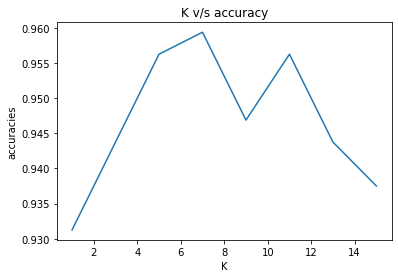

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(ks,accuracies)
plt.title("K v/s accuracy")
plt.xlabel("K")
plt.ylabel("accuracies")

In [ ]:
temp_df = pd.DataFrame({'y_true': y_test})
tuned_knn = KNeighborsClassifier(n_neighbors = new_k, metric = 'cosine')
tuned_knn.fit(X_train, y_train)
y_pred = tuned_knn.predict(X_test)
temp_df['y_pred'] = y_pred
print("accuracy :",accuracy_score(y_test, y_pred))

accuracy : 0.98


In [ ]:
temp_df

,y_true,y_pred
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
195,0,0
196,1,1
197,1,1
198,0,0


In [ ]:
print("accuracy :",accuracy_score(y_test, y_pred))

accuracy : 0.98
